In [66]:
import numpy as np
import cv2
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [67]:
(x_train , y_train ), (x_test , y_test)  = mnist.load_data()

In [68]:
x_train = x_train/255
x_test = x_test/255

In [69]:
only3n8 = []
only3n8ans = []

In [70]:
for i in range(len(y_train)):
    if (y_train[i] == 3) or (y_train[i] == 8):
        only3n8.append(x_train[i])
        if (y_train[i] == 3):
            only3n8ans.append([1,0])
        elif(y_train[i] == 8):
            only3n8ans.append([0,1])

In [71]:
size_of_input_layer = 784
size_of_hidden_layer = 100
number_of_hidden_layers = 2
size_of_output_layer = 2

In [72]:
def initialize_weights(size_of_input_layer,number_of_neurons):
    weights_layer = np.random.randn(size_of_input_layer , number_of_neurons) * np.sqrt(2/size_of_input_layer) #sqrt part is for preventing variance of weights to be too large
    weights_layer = np.transpose(weights_layer)
    return weights_layer

In [73]:
weights_ip = initialize_weights(size_of_input_layer,size_of_hidden_layer)
weights_op = initialize_weights(size_of_hidden_layer,size_of_output_layer)

In [74]:
print(len(only3n8))

11982


In [75]:
x_train_3n8 , x_test_3n8 , y_train_3n8 , y_test_3n8 = train_test_split(only3n8,only3n8ans,test_size = 0.35,shuffle  = True)

In [76]:
def activation_sigmoid(x):
    return 1/(1 + np.exp(-x))


def sigmoid_der(x):
    return (1 - x ) * x


def loss_function(real, predict):
    sum = np.sum((real - predict) ** 2)
    return sum


def predict_final(final_output):
    if(final_output[0] >= final_output[1]):
        print("Predicted Value : ", 3)
    else:
        print("Predicted Value : ", 8)

In [77]:
def predict_output(input_arr,weights_ip,weights_op):
    hl_output = activation_sigmoid(np.dot(weights_ip,input_arr))
    final_output = activation_sigmoid(np.dot(weights_op,hl_output))
    if(final_output.sum() != 0.0 and final_output.min() != 0):
        final_output = final_output/final_output.min()
        final_output = final_output/final_output.sum()   
    return hl_output,final_output

In [78]:
# def backpropagation(weights_ip,weights_op,input_data , hl_output,final_output,expected_output,learning_rate):
#     for i in range(weights_op.shape[0]):
#         for j in range(weights_op.shape[1]):
#             diff = 2 * (final_output[i] - expected_output[i]) * sigmoid_der(final_output[i]) * hl_output[j]
#             if(diff < 0):
#                 weights_op[i][j] = weights_op[i][j] + learning_rate*diff
#             else:
#                 weights_op[i][j] = weights_op[i][j] - learning_rate*diff
#     for i in range(weights_ip.shape[0]):
#         chaining = 2 * (final_output[0] - expected_output[0]) * sigmoid_der(final_output[0]) * weights_op[0][i] + 2 * (final_output[1] - expected_output[1]) * sigmoid_der(final_output[1]) * weights_op[1][i]
#         for j in range(weights_ip.shape[1]):
#             diff2 = chaining * input_data[j] * sigmoid_der(hl_output[i])
#             if(diff2 < 0):
#                 weights_ip[i][j] = weights_ip[i][j] + learning_rate*diff2
#             else:
#                 weights_ip[i][j] = weights_ip[i][j] - learning_rate*diff2
    

In [79]:
def backpropagation(weights_ip,weights_op,input_data , hl_output,final_output,expected_output,learning_rate):
    change_op_layer = 2 * (final_output - expected_output) * sigmoid_der(final_output)
    weight_op_update = learning_rate * np.outer(change_op_layer, hl_output)
    weights_op -= weight_op_update
    change_hl = np.dot(change_op_layer, weights_op) * sigmoid_der(hl_output)
    weight_ip_update = learning_rate * np.outer(change_hl, input_data)
    weights_ip -= weight_ip_update

In [80]:
hl_output,final_output = predict_output(np.reshape(x_train_3n8[4],784),weights_ip,weights_op)
print(final_output)
print(y_train_3n8[4])

[0.42208313 0.57791687]
[1, 0]


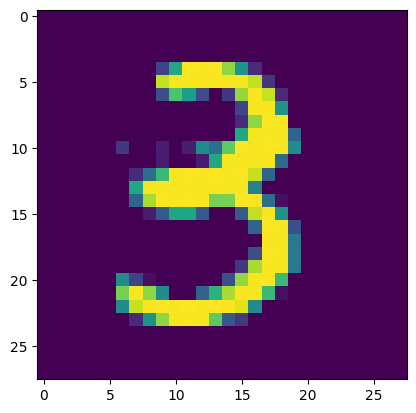

In [81]:
plt.imshow(x_train_3n8[4])

In [82]:
weights_ip

array([[-0.00618025, -0.03228085,  0.03233971, ...,  0.01496552,
        -0.01822823,  0.07492451],
       [ 0.03560981,  0.0427239 ,  0.04576671, ..., -0.00272718,
        -0.06920681,  0.05501467],
       [ 0.02512381,  0.00390072,  0.03463811, ..., -0.05581735,
        -0.04836081, -0.00621554],
       ...,
       [ 0.00373586, -0.04107017, -0.01521984, ..., -0.02640599,
         0.10799649, -0.00729249],
       [ 0.03940681, -0.01291165,  0.08039027, ...,  0.10989347,
        -0.02233041,  0.04601914],
       [ 0.0362522 ,  0.11399138, -0.06826365, ...,  0.00766509,
         0.08343283,  0.02390529]])

In [83]:
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[1],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[1],784),hl_output,final_output,[1,0],2)
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[1],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[1],784),hl_output,final_output,[1,0],2)
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[1],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[1],784),hl_output,final_output,[1,0],2)
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[1],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[1],784),hl_output,final_output,[1,0],2)
# final_output

In [84]:
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[2],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[2],784),hl_output,final_output,[0,1],2)
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[2],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[2],784),hl_output,final_output,[0,1],2)
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[2],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[2],784),hl_output,final_output,[0,1],2)
# hl_output,final_output = predict_output(np.reshape(x_train_3n8[2],784),weights_ip,weights_op)
# backpropagation(weights_ip,weights_op,np.reshape(x_train_3n8[2],784),hl_output,final_output,[0,1],2)
# final_output

In [85]:
weights_op

array([[ 0.14035355, -0.0781514 ,  0.23978219, -0.18164482, -0.20003924,
        -0.01031489,  0.03072164, -0.12046134,  0.18719717, -0.11094162,
         0.0911361 ,  0.21520402,  0.20806042,  0.07067693,  0.10523445,
        -0.15096632,  0.02705306,  0.25629267, -0.19309965, -0.26306658,
        -0.00713638,  0.16573809,  0.0095118 , -0.01389518,  0.0514921 ,
        -0.1520548 , -0.06281802,  0.07958961, -0.09603432, -0.19968244,
        -0.11937253, -0.07631752,  0.21468835, -0.19908345,  0.08462948,
         0.02413886, -0.21485182, -0.1191111 , -0.03123938, -0.16350092,
        -0.14608327, -0.03156015, -0.12793151,  0.02036344,  0.07705874,
         0.22367805,  0.09949147, -0.10655208,  0.17949089, -0.16231815,
         0.09760052, -0.24397598,  0.14885849, -0.06015046,  0.08485668,
         0.11026513, -0.0121257 , -0.23740074,  0.00742889, -0.22201559,
        -0.04332688,  0.06555223, -0.13258304,  0.3318383 ,  0.13500045,
        -0.1674682 , -0.10406343, -0.13207846,  0.0

In [86]:
epochs = 50
count = 0
total = 0

In [87]:
for i in range(epochs):
    loss_sum = 0
    for j in range(len(x_train_3n8)):
        input_arr = np.reshape(x_train_3n8[j],784)
        hl_output , final_output = predict_output(input_arr,weights_ip,weights_op)
        loss_sum += loss_function(final_output,y_train_3n8[i])
        if(((final_output[0] > final_output[1]) and (y_train_3n8[j][0] > y_train_3n8[j][1])) or ((final_output[0] < final_output[1]) and (y_train_3n8[j][0] < y_train_3n8[j][1]))):
            count = count + 1
        backpropagation(weights_ip,weights_op,input_arr,hl_output,final_output,y_train_3n8[j],0.03)
        total = total + 1
    print("Loss : ", loss_sum/len(x_train_3n8))

Loss :  0.8878473978868826
Loss :  0.8920869503556963
Loss :  0.9815097471537468
Loss :  0.9173563445741894
Loss :  0.9225696971006628
Loss :  0.9950096846131226
Loss :  0.9270628263107685
Loss :  0.9281943009131899
Loss :  1.0009737270351133
Loss :  0.9305489266958034
Loss :  0.9311738350708755
Loss :  0.9318012725694766
Loss :  0.9324745116787417
Loss :  1.0080270327120173
Loss :  0.9339678289729746
Loss :  0.9349550372228023
Loss :  0.9360157391339815
Loss :  1.010371495130579
Loss :  0.9380787567573401
Loss :  1.0118745226514583
Loss :  1.0127574372211006
Loss :  1.01371470423195
Loss :  0.9404050171329302
Loss :  1.015601274812818
Loss :  0.9413668593867619
Loss :  0.9417481540056115
Loss :  0.9419451081877094
Loss :  0.9419140337828436
Loss :  0.9415164628308234
Loss :  0.9405413226081887
Loss :  1.0187078532378844
Loss :  0.9409611693923059
Loss :  1.0197516834948523
Loss :  1.0203374886597774
Loss :  1.0210685833972575
Loss :  1.0218232765111175
Loss :  1.022488031031823
Loss :

In [88]:
accuracy = (count / total) * 100.0 

In [89]:
hl_output , final_output = predict_output(np.reshape(x_train_3n8[1235],784),weights_ip,weights_op)
predict_final(final_output)
print(final_output)
y_train_3n8[1235]

Predicted Value :  3
[9.99737004e-01 2.62995980e-04]


[1, 0]

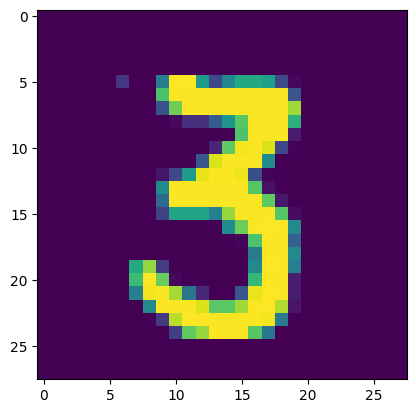

In [90]:
plt.imshow(x_train_3n8[1235])

In [91]:
accuracy

98.96841294298922

In [92]:
count

385383

In [93]:
total

389400

In [94]:
tot2 = 0
cou2 = 0

In [95]:
for i in range(len(y_test_3n8)):
    input_arr = np.reshape(x_test_3n8[i],784)
    hl_output , final_output = predict_output(input_arr,weights_ip,weights_op)
    print(" Loss : ",loss_function(final_output,y_test_3n8[i]))
    print(final_output , "  " , y_train_3n8[i])
    if(((final_output[0] > final_output[1]) and (y_test_3n8[i][0] > y_test_3n8[i][1])) or ((final_output[0] < final_output[1]) and (y_test_3n8[i][0] < y_test_3n8[i][1]))):
        cou2 = cou2 + 1
    tot2 = tot2 + 1

 Loss :  0.0005854056990368381
[0.01710856 0.98289144]    [0, 1]
 Loss :  0.26291471804657474
[0.36257049 0.63742951]    [1, 0]
 Loss :  3.4804918139484716e-05
[0.99582837 0.00417163]    [0, 1]
 Loss :  1.7286205189620215e-09
[9.99970601e-01 2.93991541e-05]    [1, 0]
 Loss :  3.932390984784295e-05
[0.00443418 0.99556582]    [1, 0]
 Loss :  0.0004752873234574621
[0.0154157 0.9845843]    [0, 1]
 Loss :  2.4550395857889966e-05
[0.0035036 0.9964964]    [1, 0]
 Loss :  1.1539594959079149e-10
[9.99992404e-01 7.59591830e-06]    [1, 0]
 Loss :  3.0803796353568155e-07
[9.99607547e-01 3.92452522e-04]    [0, 1]
 Loss :  0.06320586313347779
[0.17777213 0.82222787]    [1, 0]
 Loss :  8.566961488562432e-07
[6.54483059e-04 9.99345517e-01]    [1, 0]
 Loss :  0.004625659948431402
[0.04809189 0.95190811]    [1, 0]
 Loss :  7.64106980281646e-06
[0.00195462 0.99804538]    [1, 0]
 Loss :  1.792371555748409e-08
[9.99905333e-01 9.46670892e-05]    [0, 1]
 Loss :  0.5246973772172095
[0.51219985 0.48780015]    

 Loss :  6.218985082403941e-06
[0.99823662 0.00176338]    [1, 0]
 Loss :  1.1111966553389462e-05
[0.00235711 0.99764289]    [0, 1]
 Loss :  2.8393976313149513e-06
[0.99880849 0.00119151]    [1, 0]
 Loss :  1.697260058888794e-05
[0.00291313 0.99708687]    [1, 0]
 Loss :  3.011974704244937e-09
[9.99961193e-01 3.88070529e-05]    [0, 1]
 Loss :  0.0007752387494556205
[0.01968805 0.98031195]    [1, 0]
 Loss :  8.170598062559587e-05
[0.00639163 0.99360837]    [0, 1]
 Loss :  1.7702144496493962e-08
[9.99905920e-01 9.40801374e-05]    [1, 0]
 Loss :  0.003629403818096756
[0.04259932 0.95740068]    [0, 1]
 Loss :  8.842068689955996e-07
[6.64908591e-04 9.99335091e-01]    [0, 1]
 Loss :  2.7810869359133926e-05
[0.003729 0.996271]    [1, 0]
 Loss :  0.02384208559681394
[0.10918353 0.89081647]    [0, 1]
 Loss :  0.014414343136252615
[0.91510494 0.08489506]    [1, 0]
 Loss :  1.2098013544377606e-05
[0.00245947 0.99754053]    [0, 1]
 Loss :  1.3482905807304472e-08
[9.99917894e-01 8.21063512e-05]    [0

 Loss :  5.246315678706811e-07
[9.99487832e-01 5.12167730e-04]    [1, 0]
 Loss :  2.019315278850415e-08
[9.99899518e-01 1.00481722e-04]    [1, 0]
 Loss :  9.674878958183932e-08
[9.99780058e-01 2.19941799e-04]    [1, 0]
 Loss :  4.536184251672092e-15
[9.99999952e-01 4.76244908e-08]    [1, 0]
 Loss :  0.0002826764122904668
[0.01188857 0.98811143]    [1, 0]
 Loss :  2.4045409478752417e-05
[0.00346738 0.99653262]    [1, 0]
 Loss :  3.787591700283022e-12
[9.99998624e-01 1.37615255e-06]    [1, 0]
 Loss :  3.489305530900726e-05
[0.0041769 0.9958231]    [0, 1]
 Loss :  1.0126636954366091e-07
[2.25018188e-04 9.99774982e-01]    [1, 0]
 Loss :  2.287487433601791e-06
[0.00106946 0.99893054]    [0, 1]
 Loss :  0.00021793346405894488
[0.01043871 0.98956129]    [0, 1]
 Loss :  0.015610594397697615
[0.08834759 0.91165241]    [1, 0]
 Loss :  1.3807167276876948e-07
[2.62746715e-04 9.99737253e-01]    [0, 1]
 Loss :  0.20142333249198258
[0.31735101 0.68264899]    [0, 1]
 Loss :  0.0007416373137712126
[0.0

 Loss :  0.004471562963454275
[0.04728405 0.95271595]    [1, 0]
 Loss :  2.7540847377568178e-09
[3.71085215e-05 9.99962891e-01]    [0, 1]
 Loss :  1.1610500088978899e-07
[9.99759059e-01 2.40940865e-04]    [1, 0]
 Loss :  0.00010189235533212819
[0.00713766 0.99286234]    [1, 0]
 Loss :  2.228020381712191e-05
[0.00333768 0.99666232]    [1, 0]
 Loss :  8.960476609294184e-07
[9.99330654e-01 6.69345823e-04]    [1, 0]
 Loss :  1.7010995506607751e-10
[9.99990777e-01 9.22252555e-06]    [0, 1]
 Loss :  5.717331725777514e-14
[9.99999831e-01 1.69075896e-07]    [1, 0]
 Loss :  2.797208754508254e-08
[9.99881737e-01 1.18262605e-04]    [0, 1]
 Loss :  2.0046138924847104e-12
[9.99998999e-01 1.00115281e-06]    [0, 1]
 Loss :  4.271561995702636e-05
[0.00462145 0.99537855]    [1, 0]
 Loss :  1.9121530481989935e-05
[0.00309205 0.99690795]    [1, 0]
 Loss :  1.269746386985449e-05
[0.00251967 0.99748033]    [1, 0]
 Loss :  3.194502780926451e-07
[9.99600344e-01 3.99656276e-04]    [1, 0]
 Loss :  9.0492059185

 Loss :  2.6360013002035136e-05
[0.00363043 0.99636957]    [1, 0]
 Loss :  5.851801422062198e-08
[1.71052644e-04 9.99828947e-01]    [1, 0]
 Loss :  2.101213598720531e-08
[9.99897501e-01 1.02499112e-04]    [0, 1]
 Loss :  7.538457803558236e-07
[6.13940461e-04 9.99386060e-01]    [1, 0]
 Loss :  0.00027765300378171685
[0.01178247 0.98821753]    [0, 1]
 Loss :  9.185951145517615e-12
[9.99997857e-01 2.14312286e-06]    [0, 1]
 Loss :  1.116845779070587e-07
[9.99763690e-01 2.36309731e-04]    [1, 0]
 Loss :  6.882368717891105e-05
[0.00586616 0.99413384]    [1, 0]
 Loss :  9.262209631385358e-09
[9.99931948e-01 6.80522212e-05]    [0, 1]
 Loss :  1.0313192540438452e-11
[9.99997729e-01 2.27081401e-06]    [1, 0]
 Loss :  1.9134755139165156e-07
[9.99690688e-01 3.09311777e-04]    [1, 0]
 Loss :  1.3709816394700913e-07
[9.99738181e-01 2.61818796e-04]    [0, 1]
 Loss :  8.694629959209622e-07
[9.99340658e-01 6.59341716e-04]    [0, 1]
 Loss :  1.533019736530567e-08
[9.99912449e-01 8.75505493e-05]    [1, 

In [96]:
acc = (cou2/tot2)*100

In [97]:
acc

98.09251311397234